<a href="https://colab.research.google.com/github/Kanak-a/Data-Analysis/blob/main/Ybi_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project : Financial Market News Analysis

---

## Brief Overview :
- My name is Kanaka A. And I am an engineering student interested in the field of AI and DS.
- I had enrolled for an internship at YBI Foundation to get a gist on the projects, half way there to complete this virtual internship I had to submit an assignment where we had multiple projects to choose one from them and complete it.
- So 'Sentiment analysis on the financial market news' caught my eye. Building a model of my own which could tell me whether a particular news had a <mark> postive - (1) or negative - (0) sentiment.</mark>
- Below project helped me understanding how and when RandomFOrestClassifier must be used, how feature_extraction took place, etc.

## <font color='green'> Objective </font> : To develop a ML model capable of analyzing sentiment in financial market news articles, aiming to gain insights into overall market sentiment and potential trends.

## <font color='green'>Data Source </font>:  YBI Foundation Dataset Github
( link : https://github.com/YBI-Foundation/Dataset/blob/main/Financial%20Market%20News.csv )

## Import Library -

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data -

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Financial%20Market%20News.csv", encoding = 'ISO-8859-1')

## Describe Data

In [3]:
df.head()

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


In [4]:
df.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
df.shape

(4101, 27)

In [6]:
df.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

## Data Preprocessing

### Feature Selection

In [7]:
' '.join(str(x) for x in df.iloc[1, 2 : 27])

"Warning from history points to crash Investors flee to dollar haven Banks and tobacco in favour Review: Llama Farmers War jitters lead to sell-off Your not-so-secret history Review: The Northern Sinfonia Review: Hysteria Review: The Guardsman Opera: The Marriage of Figaro Review: The Turk in Italy Deutsche spells out its plans for diversification Traders' panic sends oil prices skyward TV sport chief leaves home over romance Leader: Hi-tech twitch Why Wenger will stick to his Gunners Out of luck England hit rock bottom Wilkinson out of his depth Kinsella sparks Irish power play Brown banished as Scots rebound Battling Wales cling to lifeline Ehiogu close to sealing Boro move Man-to-man marking Match stats French referee at centre of storm is no stranger to controversy"

In [8]:
len(df.index)

4101

In [9]:
news = []
for row in range(0, len(df.index)):
  news.append(' '.join(str(x) for x in df.iloc[row, 2: 27]))

In [10]:
news[1]

"Warning from history points to crash Investors flee to dollar haven Banks and tobacco in favour Review: Llama Farmers War jitters lead to sell-off Your not-so-secret history Review: The Northern Sinfonia Review: Hysteria Review: The Guardsman Opera: The Marriage of Figaro Review: The Turk in Italy Deutsche spells out its plans for diversification Traders' panic sends oil prices skyward TV sport chief leaves home over romance Leader: Hi-tech twitch Why Wenger will stick to his Gunners Out of luck England hit rock bottom Wilkinson out of his depth Kinsella sparks Irish power play Brown banished as Scots rebound Battling Wales cling to lifeline Ehiogu close to sealing Boro move Man-to-man marking Match stats French referee at centre of storm is no stranger to controversy"

## Define Target Variable (y) and Feature Variables (X)

In [11]:
x = news

In [12]:
type(x)

list

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(lowercase = True, ngram_range= (1,1))

In [15]:
x = cv.fit_transform(x)

In [16]:
y = df['Label']

In [17]:
x.shape

(4101, 48527)

In [18]:
y.shape

(4101,)

# Train Test Split method

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2529)

## Modeling

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators = 100)

In [29]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(x_test)

## Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
confusion_matrix(y_test, y_pred)

array([[140, 454],
       [144, 493]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.24      0.32       594
           1       0.52      0.77      0.62       637

    accuracy                           0.51      1231
   macro avg       0.51      0.50      0.47      1231
weighted avg       0.51      0.51      0.48      1231



# Explanation :
- Precision: For class 0 (negative sentiment), the precision is 0.49, indicating that among all the samples predicted as negative, 49% of them are actually negative. For class 1 (positive sentiment), the precision is 0.52, indicating that among all the samples predicted as positive, 52% of them are actually positive.

- Recall (Sensitivity): For class 0 (negative sentiment), the recall is 0.24, indicating that the model correctly identifies 24% of the actual negative samples. For class 1 (positive sentiment), the recall is 0.77, indicating that the model correctly identifies 77% of the actual positive samples.

- F1-score: For class 0 (negative sentiment), the F1-score is 0.32, which is the harmonic mean of precision and recall for negative sentiment. For class 1 (positive sentiment), the F1-score is 0.62, which is the harmonic mean of precision and recall for positive sentiment.

- Accuracy: The overall accuracy of the model is 0.51, which means that the model correctly predicts the sentiment for 51% of the samples.

# Visualiztion :


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

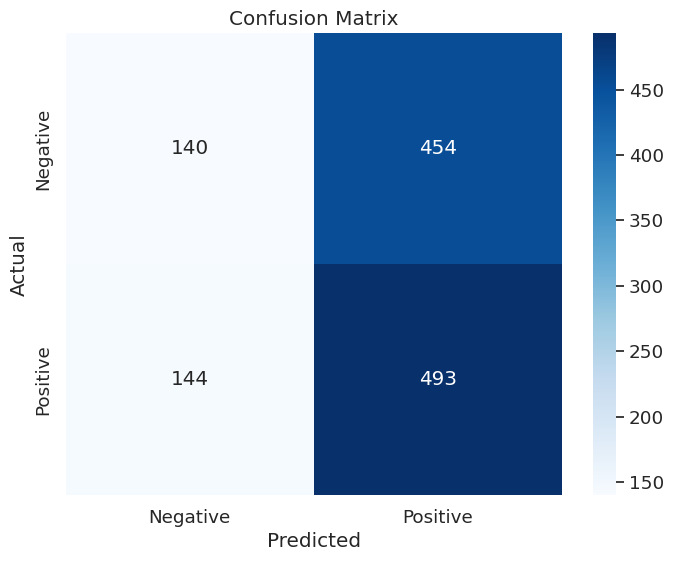

In [38]:
labels = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Explanation :    
> * This suggests us that the model is able to perform the prediction to a modest manner. It can perform sentiment analysis on the news data item and generate us with the overall sentiment that particular news item implies.